In [1]:
import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [5]:
train_file = "../data/smsspamcollection/SMSSpamCollection"

df_train = pd.read_csv(train_file, sep="\t", header=None, names=["label", "text"])
l_train = len(df_train)
print("Length of training data: %d"%(l_train))


Length of training data: 5572


In [6]:
df_train.head(10)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [7]:
df_train.text = df_train.text.str.lower()
df_train.label = df_train.label.str.lower()

In [8]:
df_train.head(10)

,label,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
5,spam,freemsg hey there darling it's been 3 week's n...
6,ham,even my brother is not like to speak with me. ...
7,ham,as per your request 'melle melle (oru minnamin...
8,spam,winner!! as a valued network customer you have...
9,spam,had your mobile 11 months or more? u r entitle...


In [9]:
null_check = df_train.isna().sum()
print("Null check on training data:")
print(null_check)


Null check on training data:
label    0
text     0
dtype: int64


In [10]:
print("Original data:")
df_train.head(5)

Original data:


,label,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [11]:
df_train.fillna(-1, inplace=True)
print("New data (after filling NaN by -1):")
df_train.head(5)

New data (after filling NaN by -1):


,label,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [12]:
print("Label distribution of training data:")
print((df_train.label.value_counts()/l_train))

Label distribution of training data:
ham     0.865937
spam    0.134063
Name: label, dtype: float64


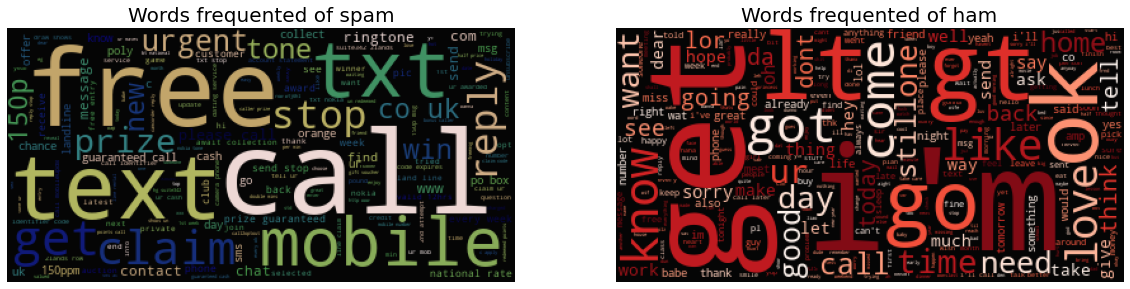

In [13]:
%matplotlib inline

dataset = df_train
eng_stopwords = set(stopwords.words("english"))

plt.figure(figsize=(20,20))
plt.subplot(121)
sub_text=dataset[dataset.label=="spam"].text.values
subwc= WordCloud(background_color="black",max_words=2000,stopwords=eng_stopwords)
subwc.generate(" ".join(sub_text))
plt.axis("off")
plt.title("Words frequented of spam", fontsize=20)
plt.imshow(subwc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

plt.subplot(122)
non_text=dataset[dataset.label=="ham"].text.values
nonwc= WordCloud(background_color="black",max_words=2000,stopwords=eng_stopwords)
nonwc.generate(" ".join(non_text))
plt.axis("off")
plt.title("Words frequented of ham", fontsize=20)
plt.imshow(nonwc.recolor(colormap= 'Reds' , random_state=244), alpha=0.98)

In [14]:
from collections import Counter
c_sub = Counter()
for sent in sub_text:
    c_sub.update(sent.split())
    
c_non = Counter()
for sent in non_text:
    c_non.update(sent.split())


In [15]:
inter_words = set(c_non).intersection(set(c_sub))
inter_words.difference_update(eng_stopwords)
print("Common words use in both: %d"%(len(inter_words)))
inter_words

Common words use in both: 1016


{'following',
 'wedding',
 'holiday',
 'woman',
 'enough',
 'remove',
 'lines',
 'wed',
 'pc',
 'sed',
 'games!',
 'taking',
 'cancel',
 'game',
 'yes!',
 'min',
 'wish.',
 'starting',
 'msgs',
 'nasty',
 'rec',
 'mates',
 'couple',
 'played',
 'night!',
 'challenge',
 'nichols',
 'accident',
 'lotr',
 'email',
 'borin',
 'u',
 'today.',
 'card',
 'you,',
 'previous',
 'mobile',
 'service',
 'waiting',
 'norm',
 '4.',
 'found',
 'park',
 'line',
 'still?',
 'sony',
 'cost.',
 'receive',
 'etc',
 'self',
 'area',
 'live',
 'off!',
 'in2',
 'leave',
 'response',
 'xxxx',
 'sounds',
 'believe',
 'paying',
 'perfect',
 "i've",
 'm8?',
 'keep',
 '1000s',
 'correct',
 'sing',
 'via',
 'fone',
 'whats',
 'fri',
 'giving',
 'b4',
 'ok!',
 'kick',
 'around',
 'choice.',
 'year.',
 'gr8',
 'amazing',
 'midnight',
 'them.',
 'back.',
 'us.',
 'sorry!',
 'connect',
 'offers',
 'mini',
 'jane',
 'seem',
 'reference',
 'log',
 'within',
 'friends',
 'yo',
 'brother',
 'loan',
 'key',
 'left',
 'best

In [16]:
sus_wd = []
for wd in inter_words:
    if c_sub[wd] >= c_non[wd]*3:
        sus_wd.append(wd)
sus_wd

['holiday',
 'mobile',
 'service',
 'line',
 'sony',
 'receive',
 '1000s',
 'offers',
 'review',
 'welcome.',
 'sms.',
 'live.',
 'landline',
 'pounds',
 '&',
 'video',
 'tried',
 'app',
 'purchase',
 'double',
 '100',
 'costs',
 'caller',
 'contact',
 'six',
 'uk',
 "u've",
 'wk.',
 'luck!',
 'award',
 'cd',
 'information',
 'calls.',
 'unlimited',
 'camera',
 'text?',
 '16',
 'enter',
 'friend.',
 'replying',
 'price',
 'pound',
 'ordered',
 'await',
 'worth',
 'activate',
 'terms',
 'biggest',
 'questions.',
 'official',
 'adult',
 'voucher',
 'club',
 'network',
 'apply',
 'summer',
 'code',
 'currently',
 'collect',
 'original',
 'store',
 's.',
 'free',
 'direct',
 'local',
 'yr',
 'week!',
 'contract',
 'subs',
 'sam',
 'attempt',
 'cost',
 'gift',
 'discount',
 'rates',
 'draw',
 'player',
 'tc',
 'laid',
 'orange',
 'anytime',
 'now!',
 'congratulations',
 'charge.',
 'cross',
 'del',
 'nokia',
 'followed',
 'services',
 'sex',
 'chat',
 'box',
 'user',
 'brand',
 'latest',
 '

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
traindev = df_train[["text","label"]].sample(frac=1,random_state=1).reset_index(drop=True)
#train, dev, test = np.split(traindev, [int(.6*len(df)), int(.8*len(df))])
train, dev = train_test_split(traindev, test_size=0.3)
train = train.reset_index(drop=True)
dev = dev.reset_index(drop=True)

In [18]:
train.to_csv("../data/smsspamcollection/train.csv", index=False)
dev.to_csv("../data/smsspamcollection/test.csv", index=False)

In [19]:
dev.head(10)

,text,label
0,can you let me know details of fri when u find...,ham
1,first answer my question.,ham
2,fyi i'm gonna call you sporadically starting a...,ham
3,you have won a nokia 7250i. this is what you g...,spam
4,i accidentally deleted the message. resend ple...,ham
5,who are you seeing?,ham
6,but your brother transfered only &lt;#&gt; +...,ham
7,happy new year my dear brother. i really do mi...,ham
8,total video converter free download type this ...,ham
9,have you started in skye,ham


In [20]:
def pieplt(data):
    print("Print len of data: %d"%len(data))
    labels = data["label"].value_counts()
    plt.figure(figsize=(10,10))
    labels.plot.pie(autopct='%.2f')

Print len of data: 3900


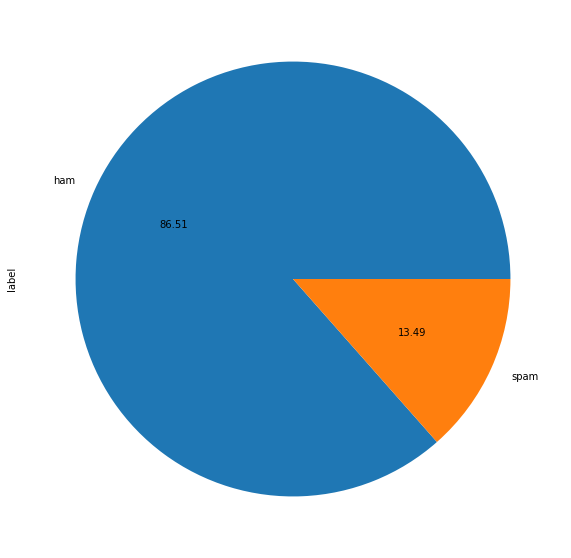

In [21]:
pieplt(train)

Print len of data: 1672


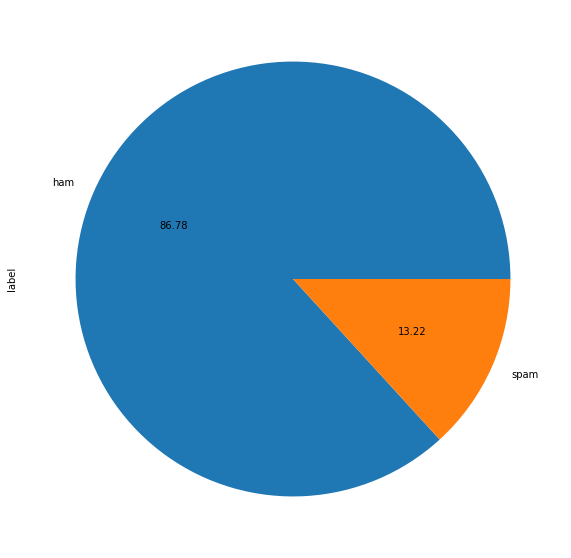

In [22]:
pieplt(dev)